In [1]:
# LOAD Packages 
import uproot
import pandas as pd
import numpy as np
import awkward as ak
!pip install awkward_pandas
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import os
import math
import csv
import seaborn as sns
import sympy as smp
import sympy.stats
from scipy import stats,signal,ndimage,special,fft
from scipy.optimize import curve_fit
from scipy.integrate import quad
from mpl_toolkits.axes_grid1 import make_axes_locatable

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# open file
ixns = uproot.open("/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_CC_pi0/caf_studies/pi0_reco_based_sample.root")
true_ixns = uproot.open("/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_CC_pi0/caf_studies/pi0_truth_based_sample.root")
#true_tracks = uproot.open("/exp/dune/app/users/ehinkle/nd_analysis/2x2_CAFs/reco_studies/pi0_reco_based_sample.root")
ixns["RecoBenchmarkTree"].show()
ixns["RecoBenchmarkTree"].keys()
#ixns["RecoBenchmarkTree"][0].num_entries
#ixns["RecoBenchmarkTree"]['caf_file_name']

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
reco_ixn_gamma_mult  | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_e_mult      | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_index       | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
reco_ixn_cont_gam... | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_e_cont_mult | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_muon_mult   | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_chpi_mult   | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_proton_mult | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_chkaon_mult | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_vtx_x_pos   | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
reco_ixn_vtx_y_pos   | std::

['reco_ixn_gamma_mult',
 'reco_ixn_e_mult',
 'reco_ixn_index',
 'reco_ixn_cont_gamma_mult',
 'reco_ixn_e_cont_mult',
 'reco_ixn_muon_mult',
 'reco_ixn_chpi_mult',
 'reco_ixn_proton_mult',
 'reco_ixn_chkaon_mult',
 'reco_ixn_vtx_x_pos',
 'reco_ixn_vtx_y_pos',
 'reco_ixn_vtx_z_pos',
 'true_ixn_pi0_mult',
 'true_ixn_cont_pi0_mult',
 'true_ixn_e_mult',
 'true_ixn_gamma_mult',
 'true_ixn_index',
 'true_ixn_muon_mult',
 'true_ixn_chpi_mult',
 'true_ixn_proton_mult',
 'true_ixn_chkaon_mult',
 'true_ixn_vtx_x_pos',
 'true_ixn_vtx_y_pos',
 'true_ixn_vtx_z_pos',
 'spill_index',
 'file_index',
 'event',
 'run',
 'subrun',
 'caf_file_name',
 'overlap']

In [3]:
# Set up data frame
ak_array = ixns["RecoBenchmarkTree"].arrays(library="ak")
df = ak.to_dataframe(ak_array)
df = df.reset_index(drop=True)
df.head()

,reco_ixn_gamma_mult,reco_ixn_e_mult,reco_ixn_index,reco_ixn_cont_gamma_mult,reco_ixn_e_cont_mult,reco_ixn_muon_mult,reco_ixn_chpi_mult,reco_ixn_proton_mult,reco_ixn_chkaon_mult,reco_ixn_vtx_x_pos,...,true_ixn_vtx_x_pos,true_ixn_vtx_y_pos,true_ixn_vtx_z_pos,spill_index,file_index,event,run,subrun,caf_file_name,overlap
0,1,0,0.0,0,0,1,0,0,0,29.042702,...,30.0,-59.0,47.0,12,1,11,0,0,MiniRun6.1_1E19_RHC.caf.0000000.CAF.flat.root,0.957143
1,1,0,0.0,0,0,1,0,0,0,47.222099,...,47.0,16.0,-22.0,35,1,33,0,0,MiniRun6.1_1E19_RHC.caf.0000000.CAF.flat.root,0.986261
2,1,0,0.0,1,0,1,0,0,0,3.325500,...,88.0,68.0,-219.0,83,1,79,0,0,MiniRun6.1_1E19_RHC.caf.0000000.CAF.flat.root,0.914617
3,2,0,3.0,1,0,1,2,0,0,7.907298,...,6.0,2.0,31.0,83,1,79,0,0,MiniRun6.1_1E19_RHC.caf.0000000.CAF.flat.root,0.958454
4,0,2,1.0,0,2,1,0,1,0,-32.811600,...,-31.0,-5.0,-86.0,91,1,87,0,0,MiniRun6.1_1E19_RHC.caf.0000000.CAF.flat.root,0.865608


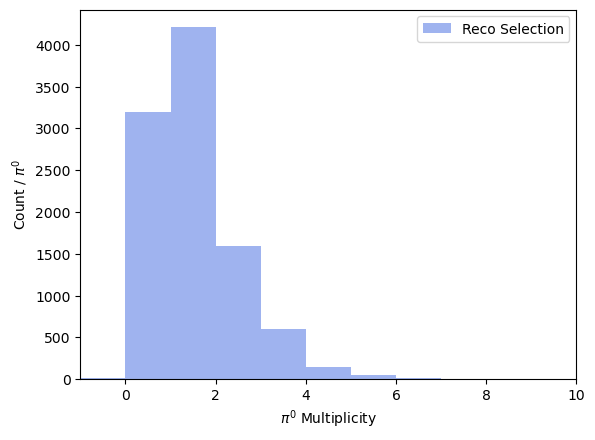

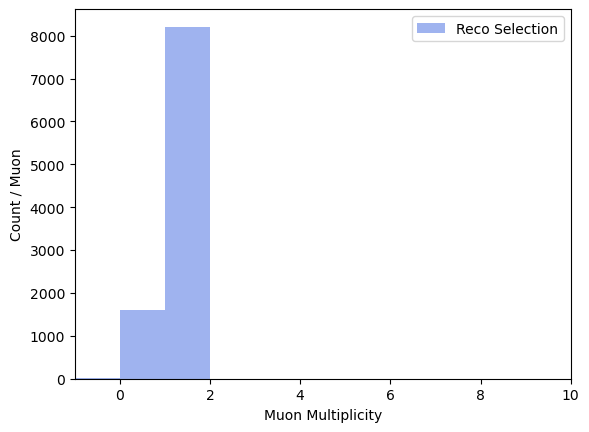

In [6]:
# Look at true pi0 and muon multiplicity

#DEFINE: Bins for num pi0s /m multiplicities
num_pi0_bins = 50
max_num_pi0s = 50
pi0_mult_bins = np.linspace(-1,max_num_pi0s, num_pi0_bins+2)

#print(pi0_mult_bins)
fig, ax = plt.subplots()
plt.hist(df['true_ixn_pi0_mult'], bins=pi0_mult_bins, histtype='stepfilled', label='Reco Selection', color='royalblue', alpha=0.5)
plt.xlim(-1,10)
ax.set_xlabel(r"$\pi^0$ Multiplicity")
ax.set_ylabel(r"Count / $\pi^0$")
plt.legend()
#plt.tight_layout()

# Look at muon multiplicity  
fig, ax = plt.subplots()
plt.hist(df['true_ixn_muon_mult'], bins=pi0_mult_bins, histtype='stepfilled', label='Reco Selection', color='royalblue', alpha=0.5)
plt.xlim(-1,10)
ax.set_xlabel(r"Muon Multiplicity")
ax.set_ylabel(r"Count / Muon")
plt.legend()


In [23]:
# Look at subset where there are no true pi0s
df_no_true_pi0s = df[df['true_ixn_pi0_mult'] == 0]
print("Number of events with no true pi0s:", len(df_no_true_pi0s))

all_events = len(df)
no_true_pi0_events = len(df_no_true_pi0s)

all_events_weights_array = np.full(all_events, 1/all_events)
no_true_pi0_events_weights_array = np.full(no_true_pi0_events, 1/no_true_pi0_events)

Number of events with no true pi0s: 3203


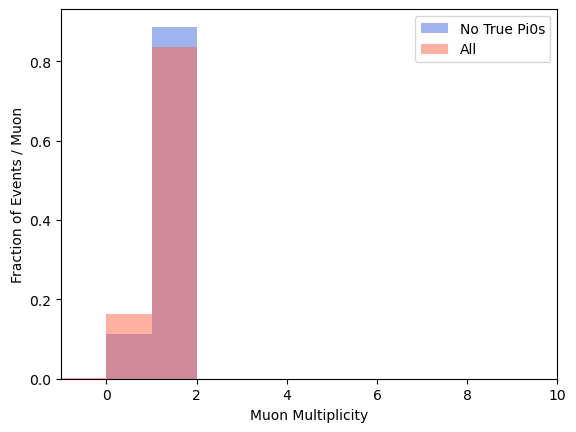

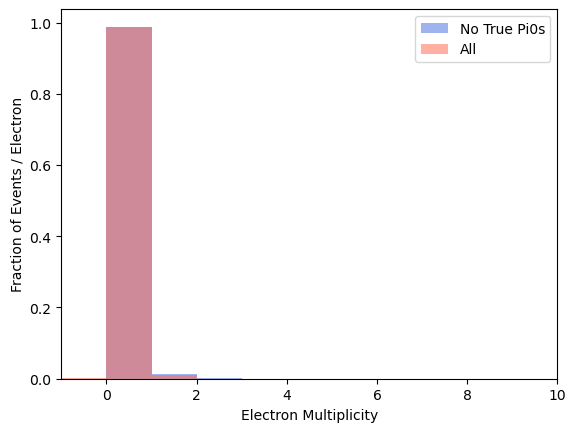

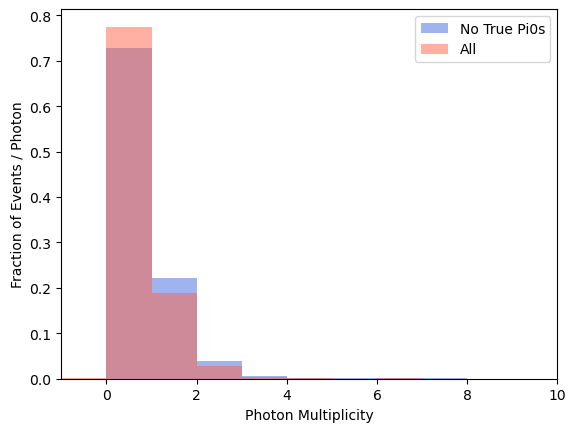

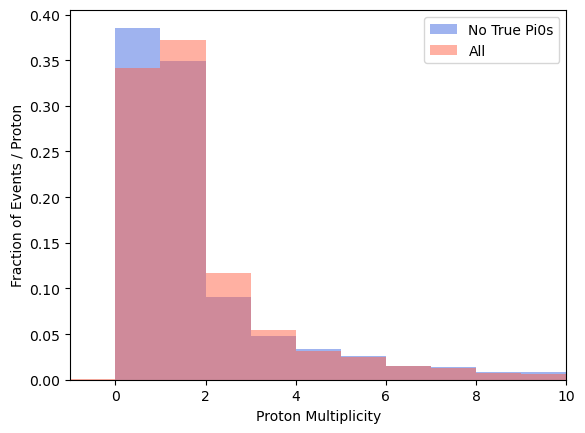

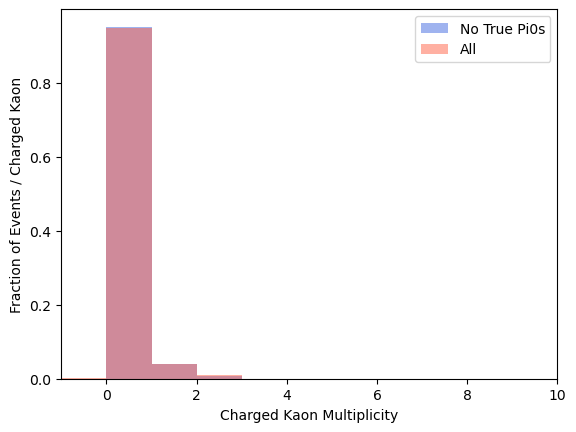

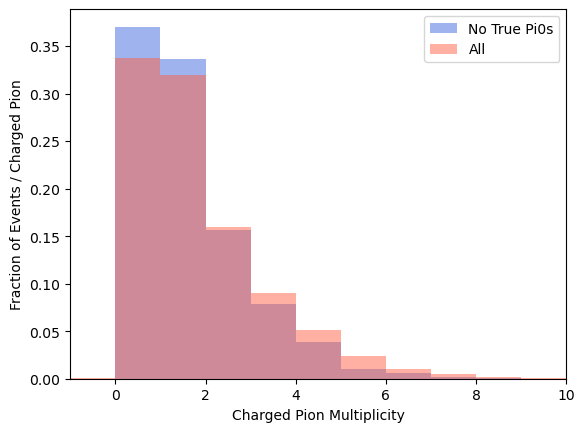

In [24]:
# Look at distributions of other particles in events with no true pi0s
# Look at muon multiplicity  
fig, ax = plt.subplots()
plt.hist(df_no_true_pi0s['true_ixn_muon_mult'], weights= no_true_pi0_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='No True Pi0s', color='royalblue', alpha=0.5)
plt.hist(df['true_ixn_muon_mult'], weights= all_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='All', color='tomato', alpha=0.5)
plt.xlim(-1,10)
ax.set_xlabel(r"Muon Multiplicity")
ax.set_ylabel(r"Fraction of Events / Muon")
plt.legend()

# Look at electron multiplicity  
fig, ax = plt.subplots()
plt.hist(df_no_true_pi0s['true_ixn_e_mult'], weights= no_true_pi0_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='No True Pi0s', color='royalblue', alpha=0.5)
plt.hist(df['true_ixn_e_mult'], weights= all_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='All', color='tomato', alpha=0.5)
plt.xlim(-1,10)
ax.set_xlabel(r"Electron Multiplicity")
ax.set_ylabel(r"Fraction of Events / Electron")
plt.legend()

# Look at photon multiplicity  
fig, ax = plt.subplots()
plt.hist(df_no_true_pi0s['true_ixn_gamma_mult'], weights= no_true_pi0_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='No True Pi0s', color='royalblue', alpha=0.5)
plt.hist(df['true_ixn_gamma_mult'], weights= all_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='All', color='tomato', alpha=0.5)
plt.xlim(-1,10)
ax.set_xlabel(r"Photon Multiplicity")
ax.set_ylabel(r"Fraction of Events / Photon")
plt.legend()

# Look at proton multiplicity  
fig, ax = plt.subplots()
plt.hist(df_no_true_pi0s['true_ixn_proton_mult'], weights= no_true_pi0_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='No True Pi0s', color='royalblue', alpha=0.5)
plt.hist(df['true_ixn_proton_mult'], weights= all_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='All', color='tomato', alpha=0.5)
plt.xlim(-1,10)
ax.set_xlabel(r"Proton Multiplicity")
ax.set_ylabel(r"Fraction of Events / Proton")
plt.legend()

# Look at charged kaon multiplicity  
fig, ax = plt.subplots()
plt.hist(df_no_true_pi0s['true_ixn_chkaon_mult'], weights= no_true_pi0_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='No True Pi0s', color='royalblue', alpha=0.5)
plt.hist(df['true_ixn_chkaon_mult'], weights= all_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='All', color='tomato', alpha=0.5)
plt.xlim(-1,10)
ax.set_xlabel(r"Charged Kaon Multiplicity")
ax.set_ylabel(r"Fraction of Events / Charged Kaon")
plt.legend()

# Look at charged pion multiplicity  
fig, ax = plt.subplots()
plt.hist(df_no_true_pi0s['true_ixn_chpi_mult'], weights= no_true_pi0_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='No True Pi0s', color='royalblue', alpha=0.5)
plt.hist(df['true_ixn_chpi_mult'], weights= all_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='All', color='tomato', alpha=0.5)
plt.xlim(-1,10)
ax.set_xlabel(r"Charged Pion Multiplicity")
ax.set_ylabel(r"Fraction of Events / Charged Pion")
plt.legend()

In [26]:
# Look at subset where there are no true muons
df_no_true_muons = df[df['true_ixn_muon_mult'] == 0]
print("Number of events with no true muons:", len(df_no_true_muons))

no_true_muon_events = len(df_no_true_muons)
no_true_muon_events_weights_array = np.full(no_true_muon_events, 1/no_true_muon_events)

Number of events with no true muons: 1610


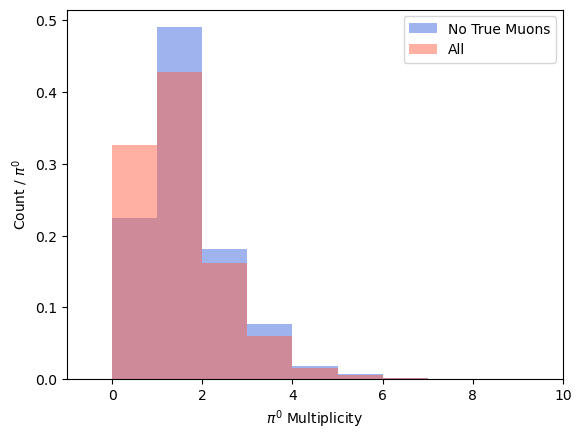

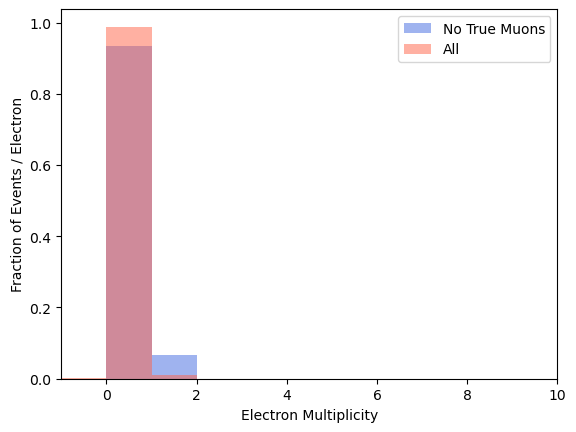

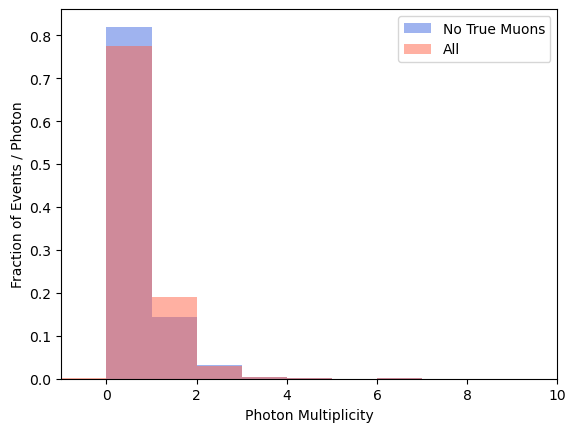

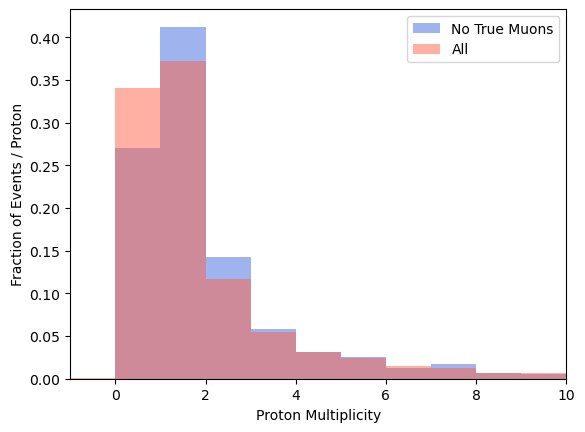

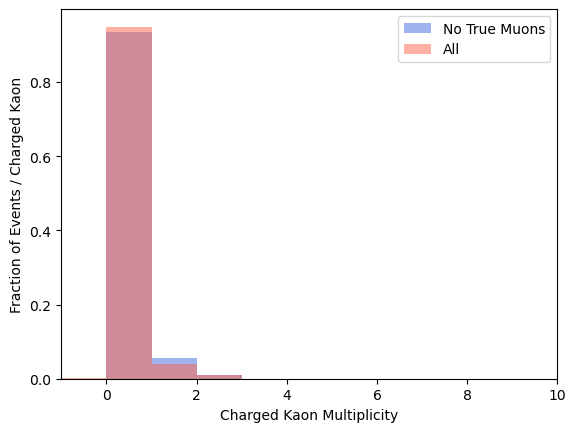

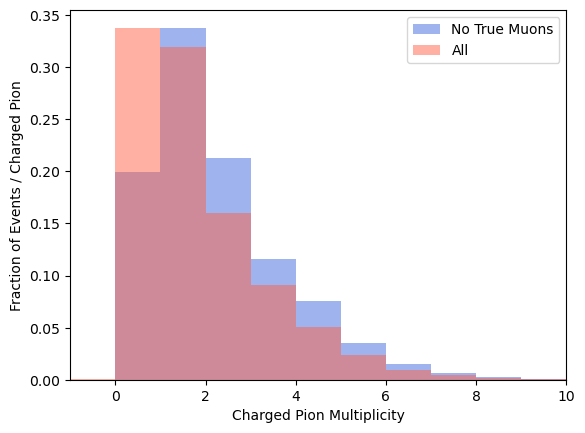

In [28]:
# Look at distributions of other particles in events with no true muons
# Look at pi0 multiplicity  
fig, ax = plt.subplots()
plt.hist(df_no_true_muons['true_ixn_pi0_mult'], weights= no_true_muon_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='No True Muons', color='royalblue', alpha=0.5)
plt.hist(df['true_ixn_pi0_mult'], weights= all_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='All', color='tomato', alpha=0.5)
plt.xlim(-1,10)
ax.set_xlabel(r"$\pi^0$ Multiplicity")
ax.set_ylabel(r"Count / $\pi^0$")
plt.legend()

# Look at electron multiplicity  
fig, ax = plt.subplots()
plt.hist(df_no_true_muons['true_ixn_e_mult'], weights= no_true_muon_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='No True Muons', color='royalblue', alpha=0.5)
plt.hist(df['true_ixn_e_mult'], weights= all_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='All', color='tomato', alpha=0.5)
plt.xlim(-1,10)
ax.set_xlabel(r"Electron Multiplicity")
ax.set_ylabel(r"Fraction of Events / Electron")
plt.legend()

# Look at photon multiplicity  
fig, ax = plt.subplots()
plt.hist(df_no_true_muons['true_ixn_gamma_mult'], weights= no_true_muon_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='No True Muons', color='royalblue', alpha=0.5)
plt.hist(df['true_ixn_gamma_mult'], weights= all_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='All', color='tomato', alpha=0.5)
plt.xlim(-1,10)
ax.set_xlabel(r"Photon Multiplicity")
ax.set_ylabel(r"Fraction of Events / Photon")
plt.legend()

# Look at proton multiplicity  
fig, ax = plt.subplots()
plt.hist(df_no_true_muons['true_ixn_proton_mult'], weights= no_true_muon_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='No True Muons', color='royalblue', alpha=0.5)
plt.hist(df['true_ixn_proton_mult'], weights= all_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='All', color='tomato', alpha=0.5)
plt.xlim(-1,10)
ax.set_xlabel(r"Proton Multiplicity")
ax.set_ylabel(r"Fraction of Events / Proton")
plt.legend()

# Look at charged kaon multiplicity  
fig, ax = plt.subplots()
plt.hist(df_no_true_muons['true_ixn_chkaon_mult'], weights= no_true_muon_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='No True Muons', color='royalblue', alpha=0.5)
plt.hist(df['true_ixn_chkaon_mult'], weights= all_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='All', color='tomato', alpha=0.5)
plt.xlim(-1,10)
ax.set_xlabel(r"Charged Kaon Multiplicity")
ax.set_ylabel(r"Fraction of Events / Charged Kaon")
plt.legend()

# Look at charged pion multiplicity  
fig, ax = plt.subplots()
plt.hist(df_no_true_muons['true_ixn_chpi_mult'], weights= no_true_muon_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='No True Muons', color='royalblue', alpha=0.5)
plt.hist(df['true_ixn_chpi_mult'], weights= all_events_weights_array, bins=pi0_mult_bins, histtype='stepfilled', label='All', color='tomato', alpha=0.5)
plt.xlim(-1,10)
ax.set_xlabel(r"Charged Pion Multiplicity")
ax.set_ylabel(r"Fraction of Events / Charged Pion")
plt.legend()

In [31]:
# Mx2 angular "minimum max angle" (back of 2x2 to edges of downstream Mx2)

y_edge_point = np.array([63.93, 0, 64.32])
y_edge_point_mx2 = np.array([108, 0, 164])

x_edge_point = np.array([0, 61.85, 64.32])
x_edge_point_mx2 = np.array([0, 145, 164])

y_ray = y_edge_point_mx2 - y_edge_point
x_ray = x_edge_point_mx2 - x_edge_point

y_ray_with_z_axis_angle = np.arccos(np.dot(y_ray, np.array([0,0,1]))/(np.linalg.norm(y_ray)*np.linalg.norm(np.array([0,0,1]))))
x_ray_with_z_axis_angle = np.arccos(np.dot(x_ray, np.array([0,0,1]))/(np.linalg.norm(x_ray)*np.linalg.norm(np.array([0,0,1]))))

print("y_ray_with_z_axis_angle:", y_ray_with_z_axis_angle)
print("x_ray_with_z_axis_angle:", x_ray_with_z_axis_angle)
print("y_ray_with_z_axis_angle (degrees):", np.degrees(y_ray_with_z_axis_angle))
print("x_ray_with_z_axis_angle (degrees):", np.degrees(x_ray_with_z_axis_angle))

y_ray_with_z_axis_angle: 0.4162772480077294
x_ray_with_z_axis_angle: 0.6952314554865864
y_ray_with_z_axis_angle (degrees): 23.850929418163552
x_ray_with_z_axis_angle (degrees): 39.83382818411876
